In [24]:
import numpy as np
import numpy.linalg as la
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
datafile = "../data/processed/UTK-peers_processed.csv"
df = pd.read_csv(datafile)
df_numeric = df.select_dtypes(exclude=['object'])

In [32]:
class PCA():
    def __init__(self):
        self.scaler = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.v = None
    
    def fit(self, x):
        # Scale the data
        self.scaler = StandardScaler().fit(x)
        xs = self.scaler.transform(x)
        
        # Calculate the SVD
        u, s, vt = la.svd(xs, full_matrices=False)
        self.v = vt.T
        
        # Calculate statistics like explained variance
        self.explained_variance_ = s**2
        self.explained_variance_ratio_ = s**2 / np.sum(s**2)
    
    def transform(self, x):
        xs = self.scaler.transform(x)
        return xs @ self.v
    
    def fit_transform(self, x):
        self.fit(self, x)
        self.transform(self, x)

In [33]:
pca = PCA()

In [34]:
pca.fit(df_numeric.values)

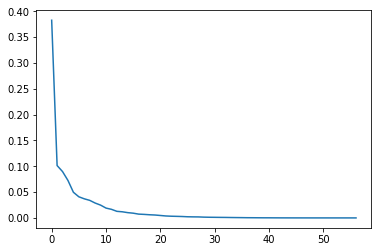

In [35]:
plt.plot(pca.explained_variance_ratio_)

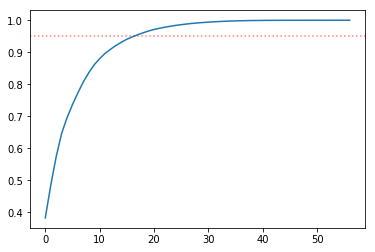

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle=":", alpha=0.5)

<BarContainer object of 57 artists>

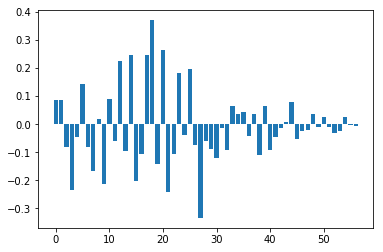

In [37]:
plt.bar(x=range(pca.v.shape[1]), height=pca.v[0])